### Monte Carlo implementation

In [1]:
import numpy as np
import random

class StochasticTwoStateMDP:
    def __init__(self):
        # Two states: 1 and 2
        self.state = None
    
    def reset(self, start_state=1):
        """Reset the environment to the start state (default 1)"""
        self.state = start_state
        return self.state

    def step(self, action):
        """Full transition dynamics for both actions.

        From State 1:
          - Action 1:
              With probability 0.9: transition to State 2, reward = 4.
              With probability 0.1: remain in State 1, reward = 1.
          - Action 2:
              With probability 0.5: transition to State 2, reward = 6.
              With probability 0.5: remain in State 1, reward = 2.

        From State 2:
          - Action 1:
              With probability 0.9: transition to State 1, reward = 1.
              With probability 0.1: remain in State 2, reward = 4.
          - Action 2:
              With probability 0.5: transition to State 1, reward = 2.
              With probability 0.5: remain in State 2, reward = 6.
        """
        s = self.state
        p = random.random()

        if s == 1:
            if action == 1:
                if p < 0.9:
                    next_state = 2
                    reward = 4
                else:
                    next_state = 1
                    reward = 1
            elif action == 2:
                if p < 0.5:
                    next_state = 2
                    reward = 6
                else:
                    next_state = 1
                    reward = 2
            else:
                raise ValueError("Invalid action")
        elif s == 2:
            if action == 1:
                if p < 0.9:
                    next_state = 1
                    reward = 1
                else:
                    next_state = 2
                    reward = 4
            elif action == 2:
                if p < 0.5:
                    next_state = 1
                    reward = 2
                else:
                    next_state = 2
                    reward = 6
            else:
                raise ValueError("Invalid action")
        else:
            raise ValueError("Invalid state")
        
        self.state = next_state
        done = False # Episodes will be terminated by fixed length.
        return next_state, reward, done, {}

In [26]:
# Let's describe an example episode:
env = StochasticTwoStateMDP()

def policy(state):
    return 1

# generate a single episode and print its details:
episode_length = 10
episode_list = []
state = env.reset()

print("Episode Trace:")
print("Step | Current State | Action Taken | Reward | Next State")
print("---------------------------------------------------------")
for t in range(episode_length):
    action = policy(state)  # Our fixed policy always returns action 1.
    next_state, reward, done, _ = env.step(action) # the environment responds to the action and sends the next state and reward
    episode_list.append((state, action, reward, next_state))
    print(f"{t+1:>4} | {state:>13} | {action:>12} | {reward:>6} | {next_state:>10}")
    state = next_state # the next state becomes the current state in the next step (or time period)

Episode Trace:
Step | Current State | Action Taken | Reward | Next State
---------------------------------------------------------
   1 |             1 |            1 |      4 |          2
   2 |             2 |            1 |      4 |          2
   3 |             2 |            1 |      1 |          1
   4 |             1 |            1 |      4 |          2
   5 |             2 |            1 |      1 |          1
   6 |             1 |            1 |      4 |          2
   7 |             2 |            1 |      1 |          1
   8 |             1 |            1 |      4 |          2
   9 |             2 |            1 |      1 |          1
  10 |             1 |            1 |      4 |          2


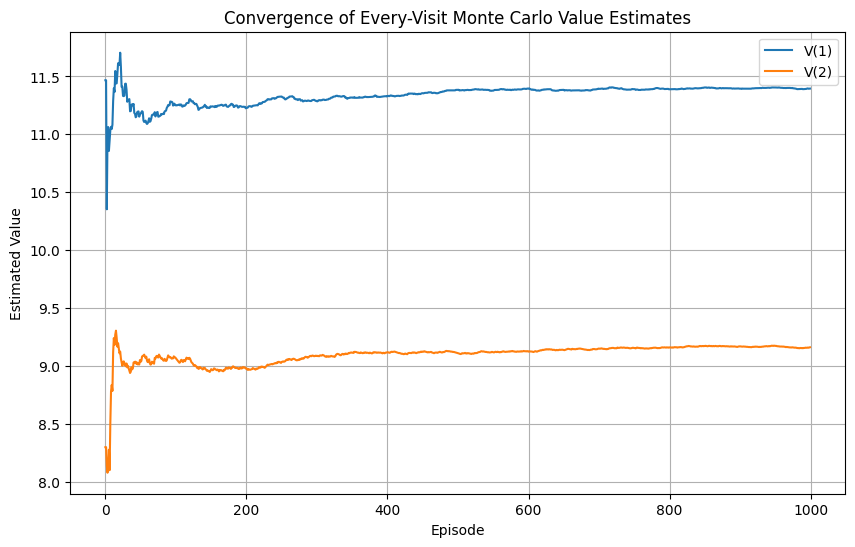

Estimated state-value function V(s) for the policy 'always choose action 1' (Every-visit Monte Carlo):
V(1) = 11.40
V(2) = 9.16


In [27]:
# Using Monte Carlo to estimate the value function:
import matplotlib.pyplot as plt

# Parameters
num_episodes = 1000
max_steps = 10
gamma = 0.9

# Dictionaries to hold cumulative returns and counts for every-visit MC
returns_sum = {1: 0.0, 2: 0.0}
returns_count = {1: 0, 2: 0}
V = {1: 0.0, 2: 0.0}

# Lists for plotting convergence
V1_history = []
V2_history = []

# Every-visit MC
for episode in range(num_episodes):
    episode_list = []
    state = env.reset()

    # Generate an episode
    for t in range(max_steps):
        action = policy(state)
        next_state, reward, done, _ = env.step(action)
        episode_list.append((state, reward))
        state = next_state
    
    # Update V(s)
    for i, (s, _) in enumerate(episode_list):
        G = 0.0
        discount = 1.0
        for j in range(i, len(episode_list)):
            _, reward = episode_list[j]
            G += discount * reward
            discount *= gamma
        returns_sum[s] += G
        returns_count[s] += 1
        V[s] = returns_sum[s] / returns_count[s]

    # Record the current estimates for plotting.
    V1_history.append(V[1])
    V2_history.append(V[2])

# Plotting the convergence of the value estimates for state 1 and state 2
plt.figure(figsize=(10, 6))
plt.plot(V1_history, label="V(1)")
plt.plot(V2_history, label="V(2)")
plt.xlabel("Episode")
plt.ylabel("Estimated Value")
plt.title("Convergence of Every-Visit Monte Carlo Value Estimates")
plt.legend()
plt.grid(True)
plt.show()


print("Estimated state-value function V(s) for the policy 'always choose action 1' (Every-visit Monte Carlo):")
print(f"V(1) = {V[1]:.2f}")
print(f"V(2) = {V[2]:.2f}")